Sample Data

In [5]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import os

In [6]:
class_names = ['Car', 'Motorcycle', 'Truck', 'Bus', 'Bicycle']

In [7]:
def draw_bbox(image_path, annotation_path , class_names):
    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width, _ = image.shape

    # Read YOLO annotations
    with open(annotation_path, 'r') as file:
        lines = file.readlines()

    fig, ax = plt.subplots(1)
    ax.imshow(image)

    for line in lines:
        class_id, x_center, y_center, bbox_width, bbox_height = map(float, line.strip().split())

        # Convert YOLO format to bounding box
        x_center *= width
        y_center *= height
        bbox_width *= width
        bbox_height *= height

        x_min = x_center - bbox_width / 2
        y_min = y_center - bbox_height / 2

        # Create a Rectangle patch
        rect = patches.Rectangle((x_min, y_min), bbox_width, bbox_height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Add class label
        plt.text(x_min, y_min, class_names[int(class_id)], color='white', fontsize=12, backgroundcolor='red')

    plt.show()


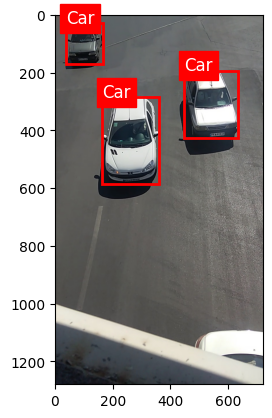

In [8]:
image_path = './dataset/images/train/160.jpg'
annotation_path = './dataset/labels/train/160.txt'
draw_bbox(image_path, annotation_path, class_names)

## Training

In [9]:
os.environ['WANDB_MODE'] = 'disabled'
cwd = os.getcwd() ## Current Path
model = YOLO('best.pt')
results = model.train(data=os.path.join(cwd, "dataset","data.yaml"), epochs=1000, imgsz=640, batch = 16)

## Testing with image

In [10]:
test = './dataset/images/test/img1048.jpg'


0: 640x640 3 Cars, 11.0ms
Speed: 3.0ms preprocess, 11.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


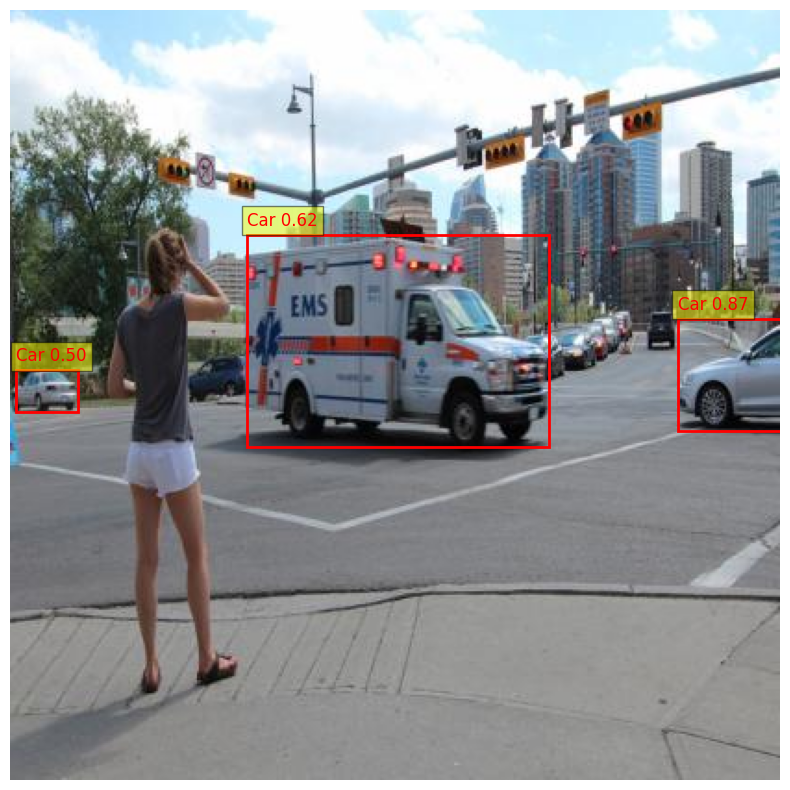

In [11]:
results = model([test])  

def plot_results(img, result):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    # Plot bounding boxes with text
    if result.boxes is not None:
        for i in range(len(result.boxes.xyxy)):
            x1, y1, x2, y2 = result.boxes.xyxy[i].cpu()
            conf = result.boxes.conf[i].cpu()
            
            cls = result.boxes.cls[i].cpu()
            label = f"{model.names[int(cls)]} {conf:.2f}"  # Class label and confidence
            plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='red', facecolor='none', linewidth=2))
            plt.text(x1, y1 - 5, label, color='red', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))

    plt.axis('off')
    plt.show()

# Process results list
for i, result in enumerate(results):
    # Load the image using OpenCV
    img = cv2.imread(test)
    # Display the result using Matplotlib
    plot_results(img, result)


## Testing with env


0: 384x640 14 Cars, 17.0ms
Speed: 2.0ms preprocess, 17.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


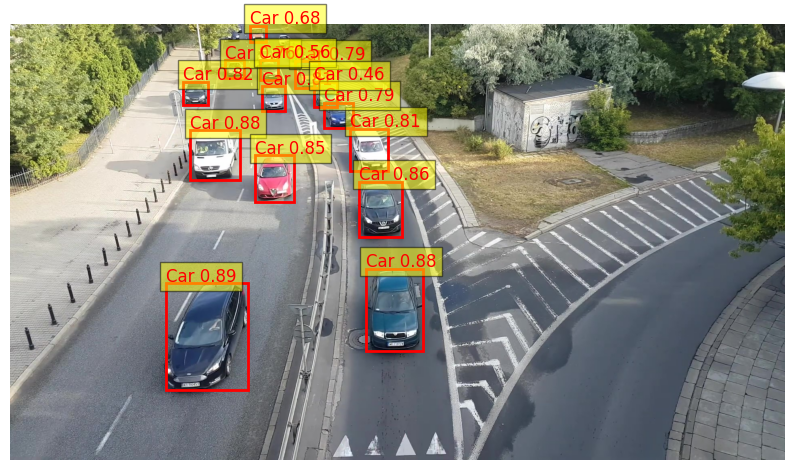

In [12]:
test = './test_img/testing.jpg'
results = model([test])  
# Process results list
for i, result in enumerate(results):
    # Load the image using OpenCV
    img = cv2.imread(test)
    # Display the result using Matplotlib
    plot_results(img, result)